In [2]:
import pandas as pd
import os

# consider of empty space, and define it as na_value too
df = pd.read_csv('../data/adult_data.csv', na_values=['?', ' ?'], skipinitialspace=True)
df = df.replace(r'^\s*\?\s*$', pd.NA, regex=True)
# make sure all '?' to be NaN
df.replace('?', pd.NA, inplace=True)
df.replace(' ?', pd.NA, inplace=True)

# fill in NaN
for col in df.columns:
    if df[col].dtype == 'O':
        mode_val = df[col].mode()[0] 
        df[col].fillna(mode_val, inplace=True)
    else:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


C:\Users\cloris\AppData\Local\Temp\ipykernel_21356\937237574.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\cloris\AppData\Local\Temp\ipykernel_21356\937237574.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [3]:
df.info()
df.describe()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   7751

In [5]:
# Analysis of continuous variables:age, education-num,hours-per-week
cont_cols = ['age','education-num','hours-per-week']
stats = df[cont_cols].describe()

# add new statistics: variance, mode, IQR
stats.loc['var'] = df[cont_cols].var()
stats.loc['mode'] = df[cont_cols].mode().iloc[0]
stats.loc['iqr'] = df[cont_cols].quantile(0.75) - df[cont_cols].quantile(0.25)
print(stats)

                age  education-num  hours-per-week
count  32561.000000   32561.000000    32561.000000
mean      38.581647      10.080679       40.437456
std       13.640433       2.572720       12.347429
min       17.000000       1.000000        1.000000
25%       28.000000       9.000000       40.000000
50%       37.000000      10.000000       40.000000
75%       48.000000      12.000000       45.000000
max       90.000000      16.000000       99.000000
var      186.061400       6.618890      152.458995
mode      36.000000       9.000000       40.000000
iqr       20.000000       3.000000        5.000000


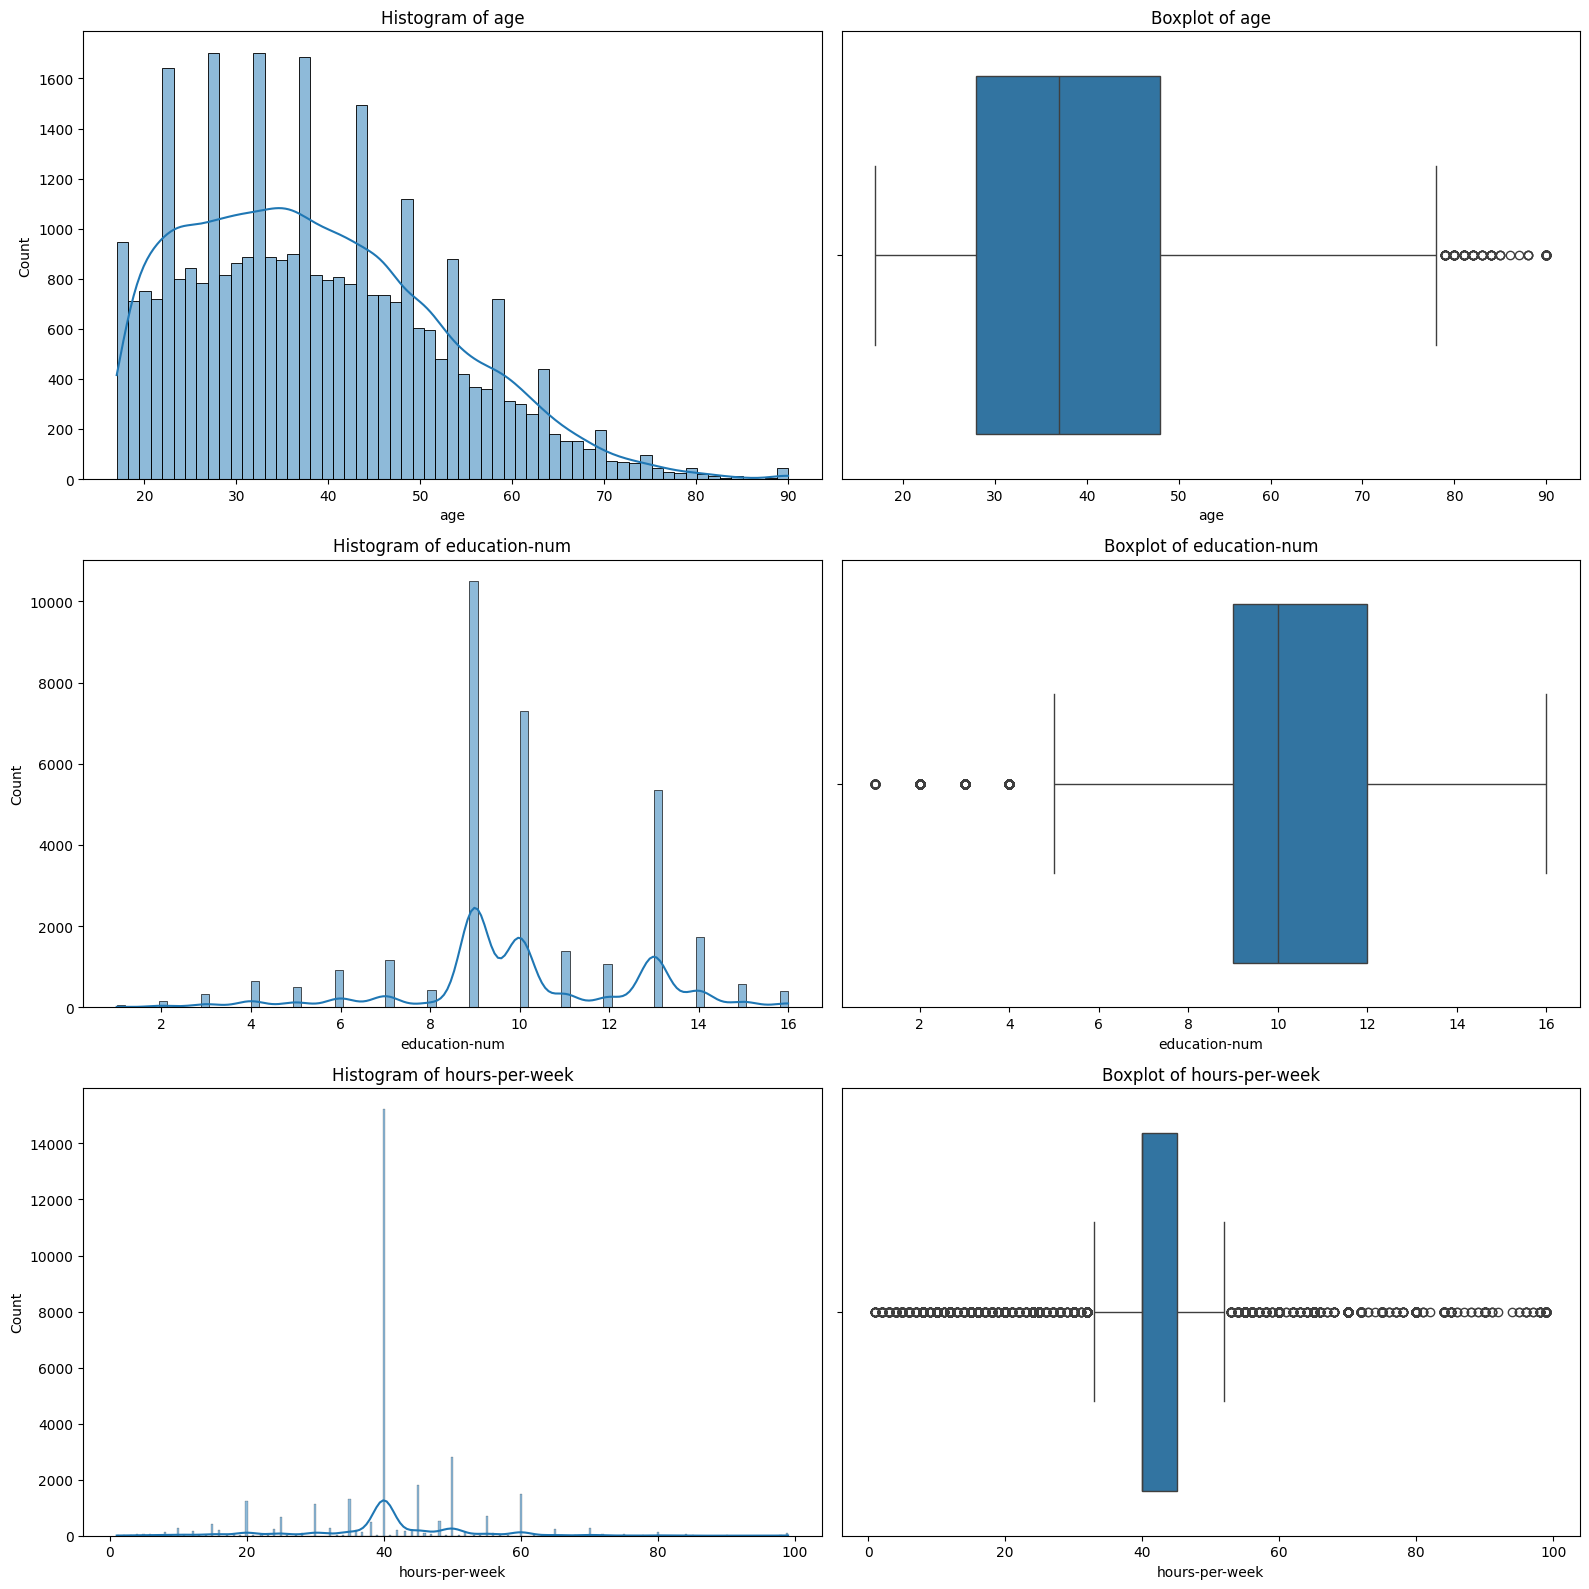

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('../plot', exist_ok=True)

fig, axes = plt.subplots(3,2,figsize = (16,16))

# create histogram and box for all continuous variables
for i,col in enumerate(cont_cols):
    sns.histplot(data=df,x=col,kde=True,ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')

    sns.boxplot(data = df,x=col,ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig(f'../plot/continuous_vars.png')
plt.show()



['<=50K' '>50K']
Probability of high income P(>50K) = 0.241
High income probability by different education:
education
Doctorate       0.741
Prof-school     0.734
Masters         0.557
Bachelors       0.415
Assoc-voc       0.261
Assoc-acdm      0.248
Some-college    0.190
HS-grad         0.160
12th            0.076
10th            0.066
7th-8th         0.062
9th             0.053
11th            0.051
5th-6th         0.048
1st-4th         0.036
Name: proportion, dtype: float64


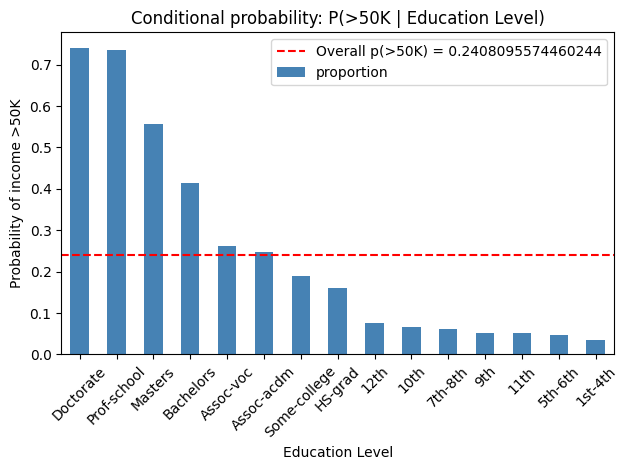

<Figure size 640x480 with 0 Axes>

In [7]:
# =========== Calculate probabilities for categorical features, e.g., P(high income | college degree)
# =========== Use conditional probabilities to understand how demographics affect income
# check income distribution(Marginal Probability无条件概率或基准概率)
print(df['income'].unique())
p_high_income_total = df['income'].value_counts(normalize=True)['>50K']
print(f"Probability of high income P(>50K) = {p_high_income_total:.3f}")

# calculate Conditional Probability,using groupby
# 1. P(>50k | education)
prob_income_by_education = df.groupby('education')['income'].value_counts(normalize=True).loc[:,'>50K']

# order the result from high probability to low probability
prob_income_by_education_sorted = prob_income_by_education.sort_values(ascending=False)
print('High income probability by different education:')
print(prob_income_by_education_sorted.round(3))

# visaulization
plt.Figure(figsize=(14,6))
prob_income_by_education_sorted.plot(kind='bar',color = 'steelblue')
plt.axhline(y=p_high_income_total, color = 'red',linestyle='--',label =f'Overall p(>50K) = {p_high_income_total}')
plt.title('Conditional probability: P(>50K | Education Level)')
plt.ylabel('Probability of income >50K')
plt.xlabel('Education Level')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'../plot/probability_Education Level.png')


High income probability by different sex:
sex
Female    0.109
Male      0.306
Name: proportion, dtype: float64


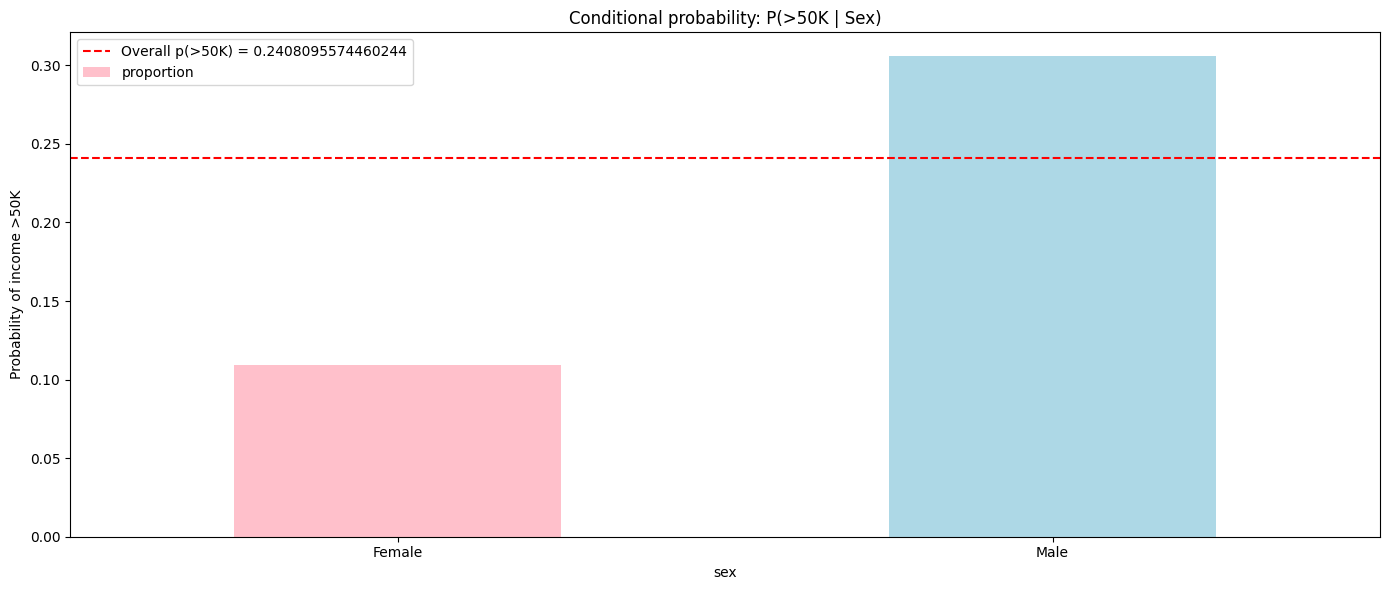

<Figure size 640x480 with 0 Axes>

In [8]:
# 2. p(>50K | sex)
prob_income_by_sex = df.groupby('sex')['income'].value_counts(normalize=True).loc[:,'>50K']

print('High income probability by different sex:')
print(prob_income_by_sex.round(3))

# visaulization
plt.figure(figsize=(14,6))
prob_income_by_sex.plot(kind='bar',color = ['pink','lightblue'])
plt.axhline(y=p_high_income_total, color = 'red',linestyle='--',label =f'Overall p(>50K) = {p_high_income_total}')
plt.title('Conditional probability: P(>50K | Sex)')
plt.ylabel('Probability of income >50K')
plt.xticks(rotation = 0)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'../plot/probability_Sex.png')

High income probability by different occupation:
occupation
Exec-managerial      0.484
Prof-specialty       0.343
Protective-serv      0.325
Tech-support         0.305
Sales                0.269
Craft-repair         0.227
Transport-moving     0.200
Adm-clerical         0.134
Machine-op-inspct    0.125
Farming-fishing      0.116
Armed-Forces         0.111
Handlers-cleaners    0.063
Other-service        0.042
Priv-house-serv      0.007
Name: proportion, dtype: float64


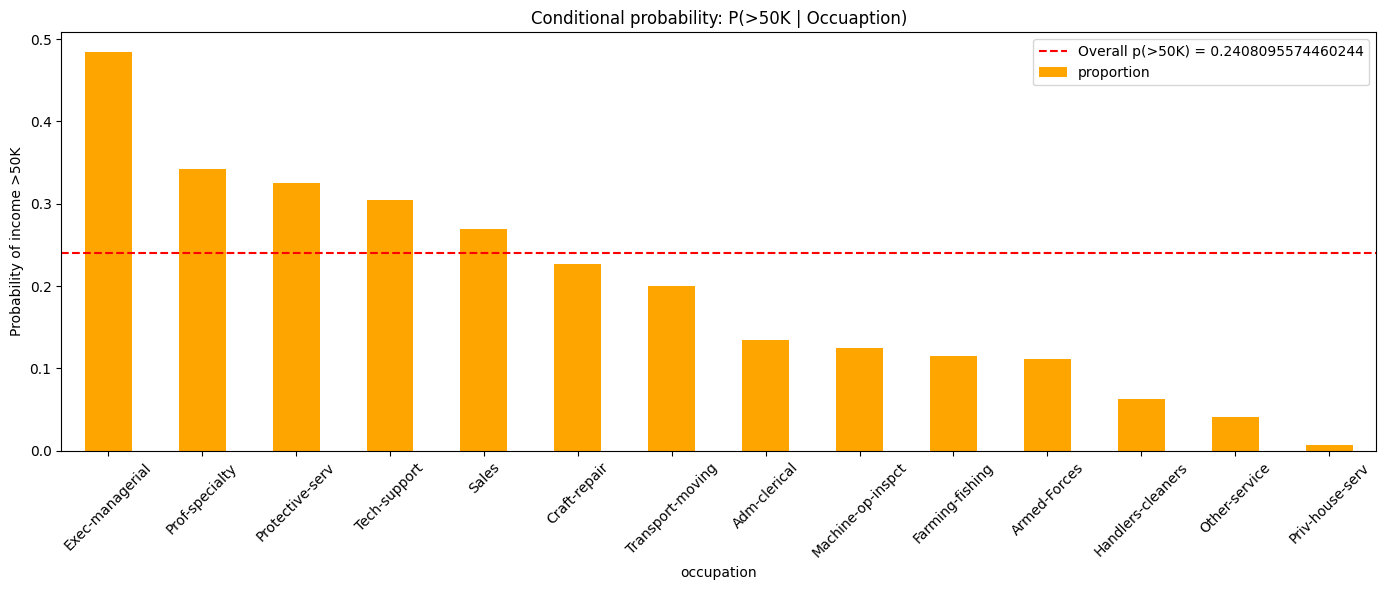

<Figure size 640x480 with 0 Axes>

In [9]:
# 3. p(>50K | occupation)
prob_income_by_occupation = df.groupby('occupation')['income'].value_counts(normalize=True).loc[:,'>50K'].sort_values(ascending=False)

print('High income probability by different occupation:')
print(prob_income_by_occupation.round(3))

# visaulization
plt.figure(figsize=(14,6))
prob_income_by_occupation.plot(kind='bar',color = 'orange')
plt.axhline(y=p_high_income_total, color = 'red',linestyle='--',label =f'Overall p(>50K) = {p_high_income_total}')
plt.title('Conditional probability: P(>50K | Occuaption)')
plt.ylabel('Probability of income >50K')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'../plot/probability_Occupation.png')

High income probability by different race:
race
Asian-Pac-Islander    0.266
White                 0.256
Black                 0.124
Amer-Indian-Eskimo    0.116
Other                 0.092
Name: proportion, dtype: float64


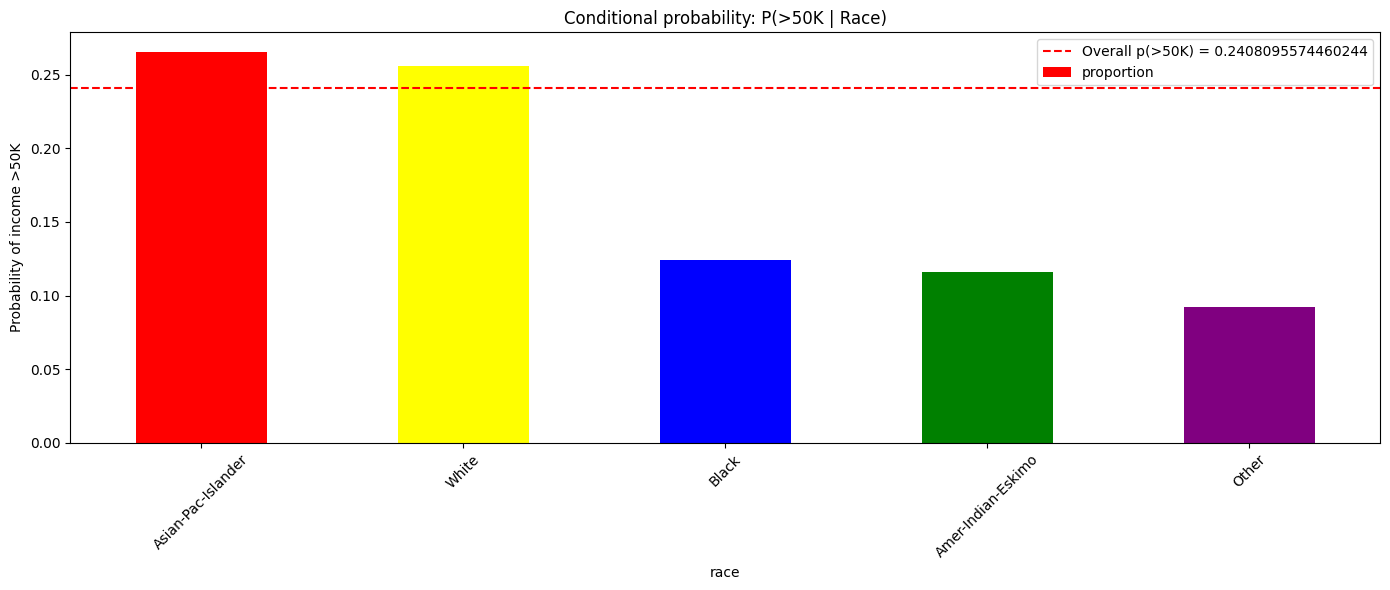

<Figure size 640x480 with 0 Axes>

In [10]:
# 4. p(>50K | race)
prob_income_by_race = df.groupby('race')['income'].value_counts(normalize=True).loc[:,'>50K'].sort_values(ascending=False)

print('High income probability by different race:')
print(prob_income_by_race.round(3))

# visaulization
plt.figure(figsize=(14,6))
prob_income_by_race.plot(kind='bar',color = ['Red','Yellow','Blue','Green','Purple'])
plt.axhline(y=p_high_income_total, color = 'red',linestyle='--',label =f'Overall p(>50K) = {p_high_income_total}')
plt.title('Conditional probability: P(>50K | Race)')
plt.ylabel('Probability of income >50K')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'../plot/probability_Race.png')

High income probability by different marital-status:
marital-status
Married-civ-spouse       0.447
Married-AF-spouse        0.435
Divorced                 0.104
Widowed                  0.086
Married-spouse-absent    0.081
Separated                0.064
Never-married            0.046
Name: proportion, dtype: float64


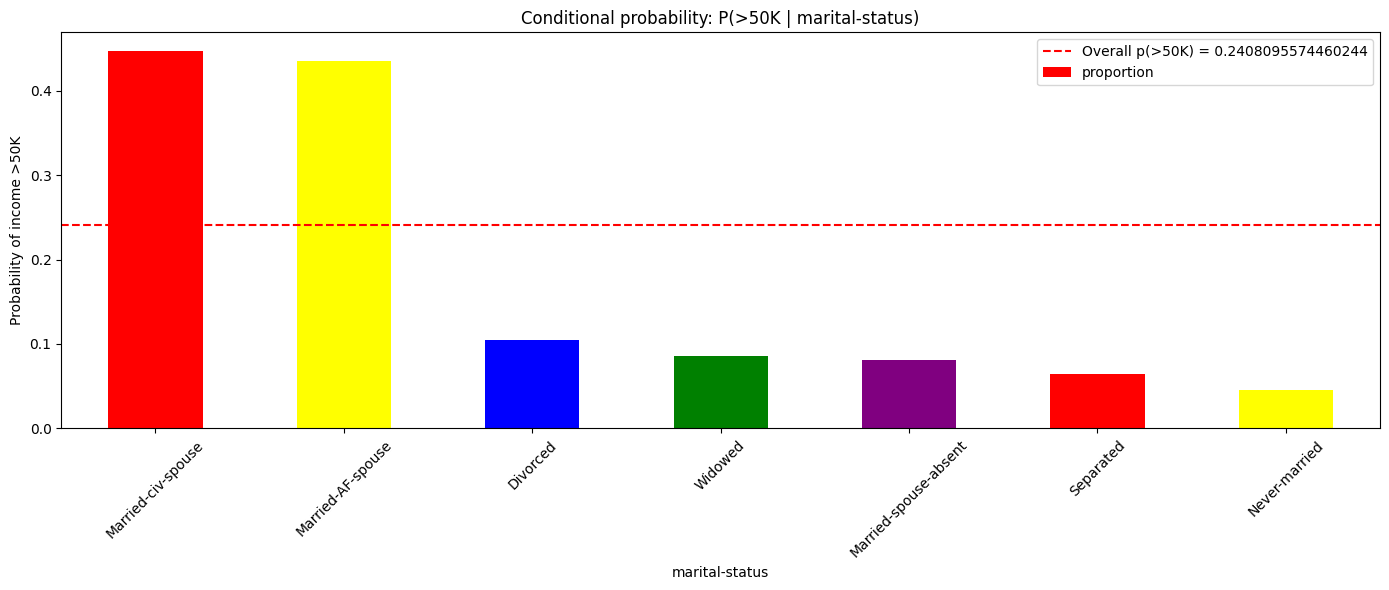

<Figure size 640x480 with 0 Axes>

In [11]:
# 5. p(>50K | marital-status)
prob_income_by_marital_status = df.groupby('marital-status')['income'].value_counts(normalize=True).loc[:,'>50K'].sort_values(ascending=False)

print('High income probability by different marital-status:')
print(prob_income_by_marital_status.round(3))

# visaulization
plt.figure(figsize=(14,6))
prob_income_by_marital_status.plot(kind='bar',color = ['Red','Yellow','Blue','Green','Purple'])
plt.axhline(y=p_high_income_total, color = 'red',linestyle='--',label =f'Overall p(>50K) = {p_high_income_total}')
plt.title('Conditional probability: P(>50K | marital-status)')
plt.ylabel('Probability of income >50K')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'../plot/probability_marital-status.png')


C:\Users\cloris\AppData\Local\Temp\ipykernel_21356\3511910216.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_income_by_agegroup = df.groupby('age_group')['income'].value_counts(normalize=True).loc[:,'>50K'].sort_values(ascending=False)


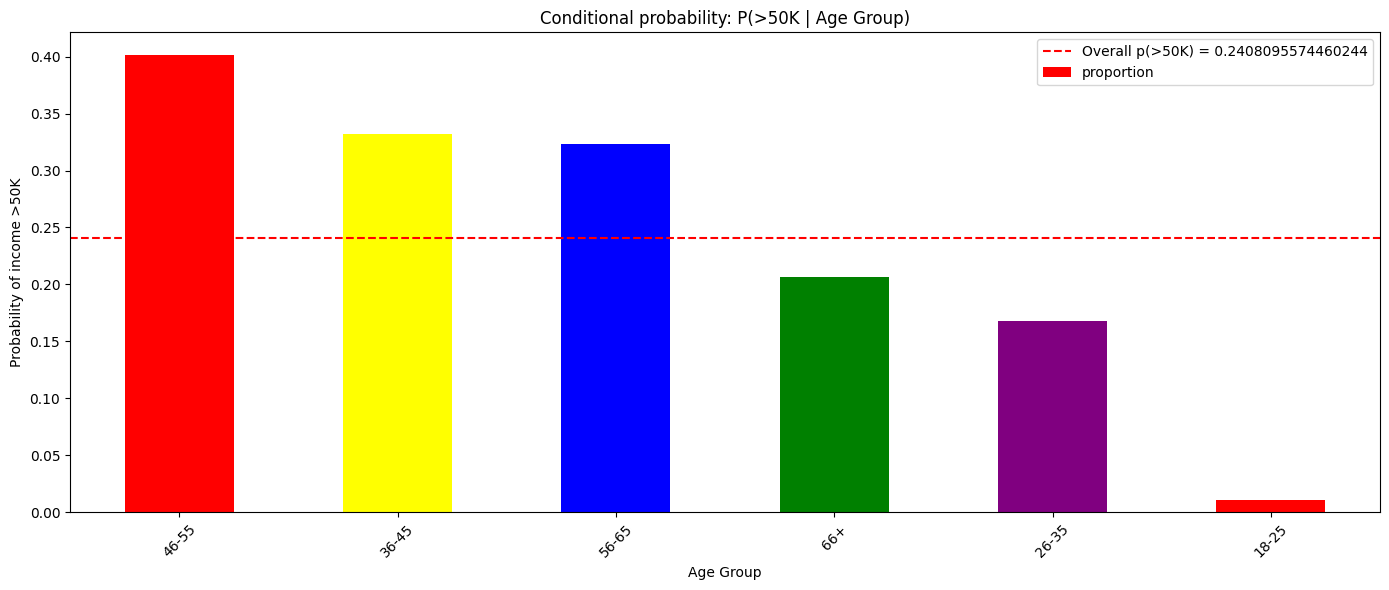

<Figure size 640x480 with 0 Axes>

In [12]:
# Optionally, create binned groups for age or hours and analyze probabilities of high income per group.
# 6. p(>50K | age group)
# create age bins
age_bins = [0,25,35,45,55,65,100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'],bins=age_bins,labels=age_labels,right = False)

# consider age_group as a categorial vasiable and calculate p(>50K | age_group)
prob_income_by_agegroup = df.groupby('age_group')['income'].value_counts(normalize=True).loc[:,'>50K'].sort_values(ascending=False)

# visaulization
plt.figure(figsize=(14,6))
prob_income_by_agegroup.plot(kind='bar',color = ['Red','Yellow','Blue','Green','Purple'])
plt.axhline(y=p_high_income_total, color = 'red',linestyle='--',label =f'Overall p(>50K) = {p_high_income_total}')
plt.title('Conditional probability: P(>50K | Age Group)')
plt.ylabel('Probability of income >50K')
plt.xlabel('Age Group')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'../plot/probability_age_group.png')


C:\Users\cloris\AppData\Local\Temp\ipykernel_21356\435469390.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prob_income_by_hoursgroup = df.groupby('hours_group')['income'].value_counts(normalize=True).loc[:,'>50K'].sort_values(ascending=False)


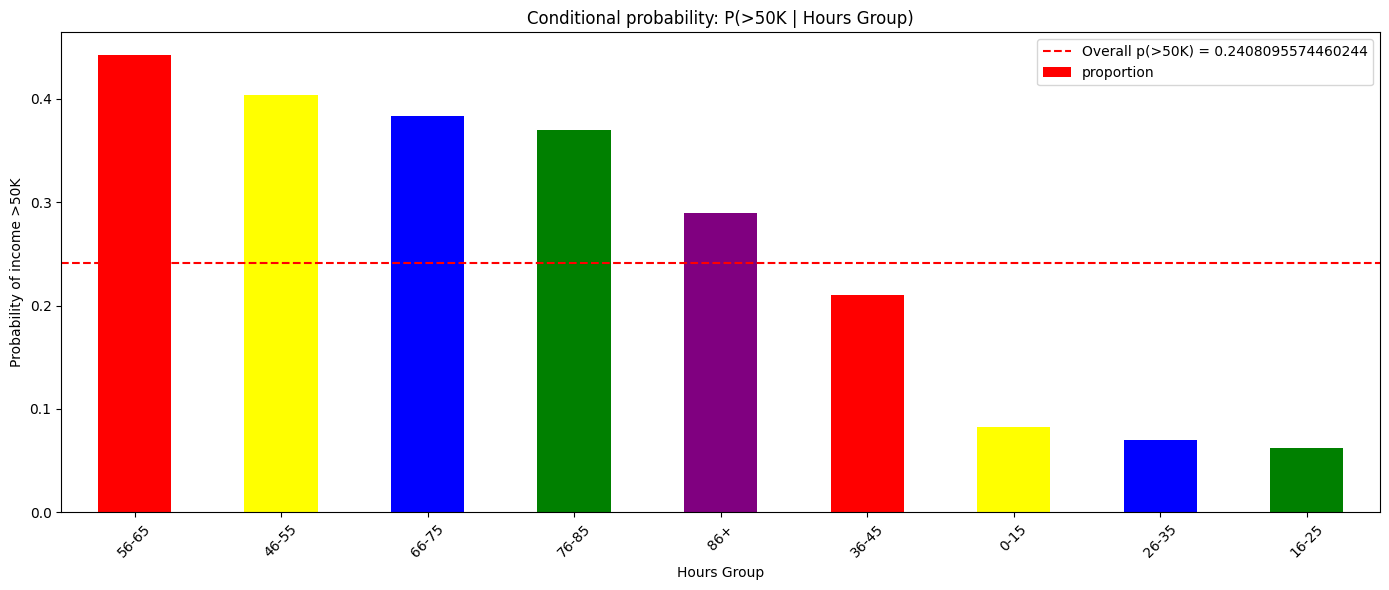

<Figure size 640x480 with 0 Axes>

In [13]:
# 7. hours-per-week
# create age bins
hours_per_week_bins = [0,15,25,35,45,55,65,75,85,100]
hours_per_week_labels = ['0-15','16-25', '26-35', '36-45', '46-55', '56-65', '66-75','76-85','86+']
df['hours_group'] = pd.cut(df['hours-per-week'],bins=hours_per_week_bins,labels=hours_per_week_labels,right = False)

# consider age_group as a categorial vasiable and calculate p(>50K | age_group)
prob_income_by_hoursgroup = df.groupby('hours_group')['income'].value_counts(normalize=True).loc[:,'>50K'].sort_values(ascending=False)

# visaulization
plt.figure(figsize=(14,6))
prob_income_by_hoursgroup.plot(kind='bar',color = ['Red','Yellow','Blue','Green','Purple'])
plt.axhline(y=p_high_income_total, color = 'red',linestyle='--',label =f'Overall p(>50K) = {p_high_income_total}')
plt.title('Conditional probability: P(>50K | Hours Group)')
plt.ylabel('Probability of income >50K')
plt.xlabel('Hours Group')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'../plot/probability_hours_group.png')